<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Vinca Rosmorduc (CLS), Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=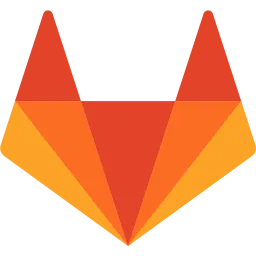" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CCase%20studies%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=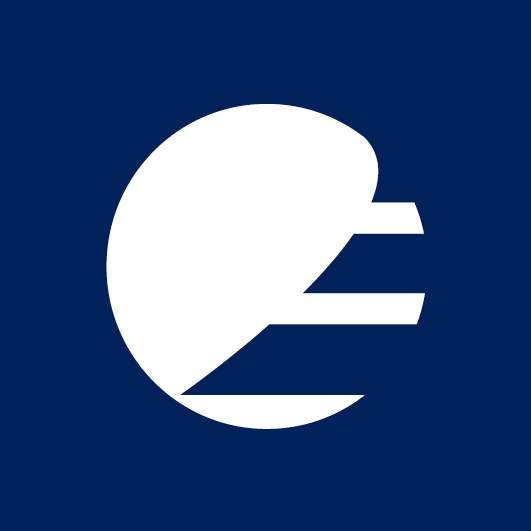" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh07%2FSLR_S6%2FSLR_with_S6.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UNOD/Ch07/SLR_S6/SLR_with_S6.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>  
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** if you are using or plan to use the EUMETSAT Data Store

There are no prerequisite notebooks for this module.
</div>
<hr>

# Calculating sea level rise from Sentinel-6

<font color="#138D75">**UN Ocean Decade Challenge 7: Expand the Global Ocean Observing System**</font>

### Data used

| Product Description  | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry Level 2 High Resolution (baseline version F08) Reprocessed | EO:EUM:DAT:0842 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0842" target="_blank">Description</a> | - | - | - | - |
| Global ocean MSL time series and trend from observations (reprocessing) | - | - | - | - | OMI_CLIMATE_SL_GLOBAL_area_averaged_anomalies | <a href="https://data.marine.copernicus.eu/product/OMI_CLIMATE_SL_GLOBAL_area_averaged_anomalies/description" target="_blank">Description</a>|
| Global ocean MSL trend map from observations (reprocessing) | - | - | - | - | OMI_CLIMATE_SL_GLOBAL_regional_trends | <a href="https://data.marine.copernicus.eu/product/OMI_CLIMATE_SL_GLOBAL_regional_trends/description" target="_blank">Description</a>|


### Learning outcomes

At the end of this notebook you will know how to;
* ...

### Outline

<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/MSL_regional_trends.png' align='right' width='100%'/>

General principle of computing one point of the global MSL.

The global Mean Sea Level is computed from the altimetric "reference mission", namely today (2023/04/19), Sentinel-6 Michael Freilich.
We won't compute the whole time series here, but show the basis of computing one point in this along-time data series.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>
    
 1. [Setting up our analysis](#section1)
 1. [Downloading from the EUMETSAT Data Store via API](#section2)
 1. [Aggregating and processing our Sentinel-6 products](#section3)
 1. [Spatially binning the along-track data](#section4)
 1. [Calculating the global mean for this cycle](#section5)
 1. [Fetching a full time series from the Copernicus Marine Service](#section6)  

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../../README.md" target="_blank">README</a>**.

In [1]:
import glob                     # a package that helps with file searching
import os                       # a library that allows us access to basic operating system commands
import eumdac                   # a tool that helps us download via the eumetsat/data-store
from pathlib import Path        # a library that helps construct system path objects
import json                     # a library that helps us make JSON format files
import datetime                 # a library that allows us to work with dates and times
import shutil                   # a library that allows us access to basic operating system commands like copy
import cartopy                  # a library that supports mapping and projection
import matplotlib.pyplot as plt # a library the provides plotting capability
import xarray as xr             # a library that helps us work efficiently with multi-dimensional arrays
import numpy as np              # a library that lets us work with arrays; we import this with a new name "np"
from scipy import stats         # a statistical library
import copernicusmarine         # a library that enables accessing CMEMS data
import pandas as pd             # a library for time series analysis
import cmocean as cm            # a library that contains oceanographic colour maps
import warnings                  # a library that supports managing warning messages

# turn off warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In [2]:
# Create a download directory for our products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

download_data = False
cycle = 53

<div class="alert alert-info" role="alert">

## 2. <a id='section2'></a>Downloading from the EUMETSAT Data Store via API
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [3]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '4b5174f9-5967-378f-a19e-6167742059ca' expires 2024-09-28 08:58:04.945313


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [4]:
datastore = eumdac.DataStore(token)

In [5]:
if download_data:
    for collection_id in datastore.collections:
        if ("Poseidon-4" in collection_id.title):
            if "non-public" in collection_id.abstract: continue
            print(f"Collection ID({collection_id}): {collection_id.title}")

From the lists above, we will pick the "Poseidon-4 Altimetry Level 2 Low Resolution (baseline version FXX) - Sentinel-6 - Reprocessed" collection ID. (the baseline number is evolving with new reprocessing; if you have older files from another baseline (see at the end of the folder/file name, just before the .SEN6 or .nc), replace them with the newest, *_do not use inhomogeneous baselines_* especially not in computations such as mean sea level)

To download only the files we'll be using, select only the "reduced" (RED) files only from the NTC delay ('NT') and download it. (NB using the Reprocessed product, they will always be "NTC", so there is no necessity for this condition in fact - just to show how it is done)

In [6]:
if download_data:
    collectionID = 'EO:EUM:DAT:0842'
    selected_collection = datastore.get_collection(collectionID)

    # space/time filter the collection for products
    products = selected_collection.search(cycle=cycle, timeliness="NT")
    print(f"Found {len(products)} products")

In [7]:
if download_data:
    count = 0
    for product in products:
        count = count + 1
        for entry in product.entries:
            if 'S6A_P4_2__LR_RED_' in entry:
                with product.open(entry=entry) as fsrc, open(os.path.join(os.getcwd(), 'products',fsrc.name), mode='wb') as fdst:
                    shutil.copyfileobj(fsrc, fdst)
                    print(f'Downloaded ({str(count).zfill(3)}:{len(products)}): {fsrc.name}')

<div class="alert alert-info" role="alert">

## 3. <a id='section3'></a>Aggregating and processing our Sentinel-6 products
[Back to top](#TOC_TOP)

</div>

We read the data from a full cycle (track 1 to 254) from Sentinel-6 Reduced Non Time Critical level 2 Low resolution data.   
LR are more homogeneous with previous mission (and you don't need high resolution to compute a global mean sea level). 
NTC are more accurate (in particular relative to the orbit), and more homogeneous along the mission; when a reprocessing is done, it is done on the whole mission from its beginning, while NRT or STC processing or corrections can be changed without this applied to the oldest data. 
Reduced is because we don't need the extra information you have in the standard version.

reading all the files together + defining needed variables

In [8]:
s6_files = glob.glob(os.path.join(download_dir,'S6A_P4_2__LR_RED_*.nc'))
#we sort the files - by default it is "alphabetical" order, but pass numbers are also correctly ordered, which is our goal
# this sorting will provide with a well-orderer dataset/nc file (see next cell). 
# It is not absolutely vital to the present computation, but could be necessary in other cases
s6_files.sort()

if s6_files != []:
    s6cycle01 = xr.open_mfdataset(s6_files, group='data_01', combine='nested', concat_dim='time', compat='no_conflicts')
    s6cycle01ku = xr.open_mfdataset(s6_files, group='data_01/ku', combine='nested', concat_dim='time', compat='no_conflicts')
else:
    print('no files found')

#definition of the variables we will need
lat = s6cycle01['latitude']
lon = s6cycle01['longitude']
time = s6cycle01['time']
ssha = s6cycle01ku['ssha']

# use of the different flags ; 0 is for ocean (surface flag), no rain nor sea ice or for "good" (quality flags)
# alternate values are > 0, so if all the conditions are met, the sum will be zero.
flags_ssha = np.array(s6cycle01.surface_classification_flag) \
           + np.array(s6cycle01ku.range_ocean_qual) \
           + np.array(s6cycle01ku.off_nadir_angle_wf_ocean_qual) \
           + np.array(s6cycle01ku.sig0_ocean_qual) \
           + np.array(s6cycle01ku.swh_ocean_qual) \
           + np.array(s6cycle01.rain_flag) \
           + np.array(s6cycle01.meteo_map_availability_flag) \
           + np.array(s6cycle01.mean_sea_surface_sol1_qual) \
           + np.array(s6cycle01.rad_sea_ice_flag) \
           + np.array(s6cycle01.rad_wet_tropo_cor_qual)

ssha[flags_ssha != 0.0] = np.nan

# remove a few extreme outliers left
ssha = ssha.where((ssha > -2) & (ssha < 2))

In [9]:
s6cycle01

<xarray.Dataset> Size: 527MB
Dimensions:                                   (time: 849249)
Coordinates:
    latitude                                  (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    longitude                                 (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
  * time                                      (time) datetime64[ns] 7MB 2022-...
Data variables: (12/88)
    altitude                                  (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    altitude_rate                             (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    altitude_rate_mean_sea_surface            (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    angle_of_approach_to_coast                (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    climato_use_flag                          (time) float32 3MB dask.array<chunksize=(3373,), meta=np.ndarray>
    dac                                       (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    ...                                        ...
    total_electron_content                    (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_alt                            (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_alt_mle3                       (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_alt_nr                         (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_mod_u                          (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>
    wind_speed_mod_v                          (time) float64 7MB dask.array<chunksize=(3373,), meta=np.ndarray>

Plotting the full cycle ; at this stage, we have along-track data with time as dimension. 
Note that this plot is taking time with 254 times about 3350 points to plot (**_this cell can be skipped with no impact on the following computations_**)

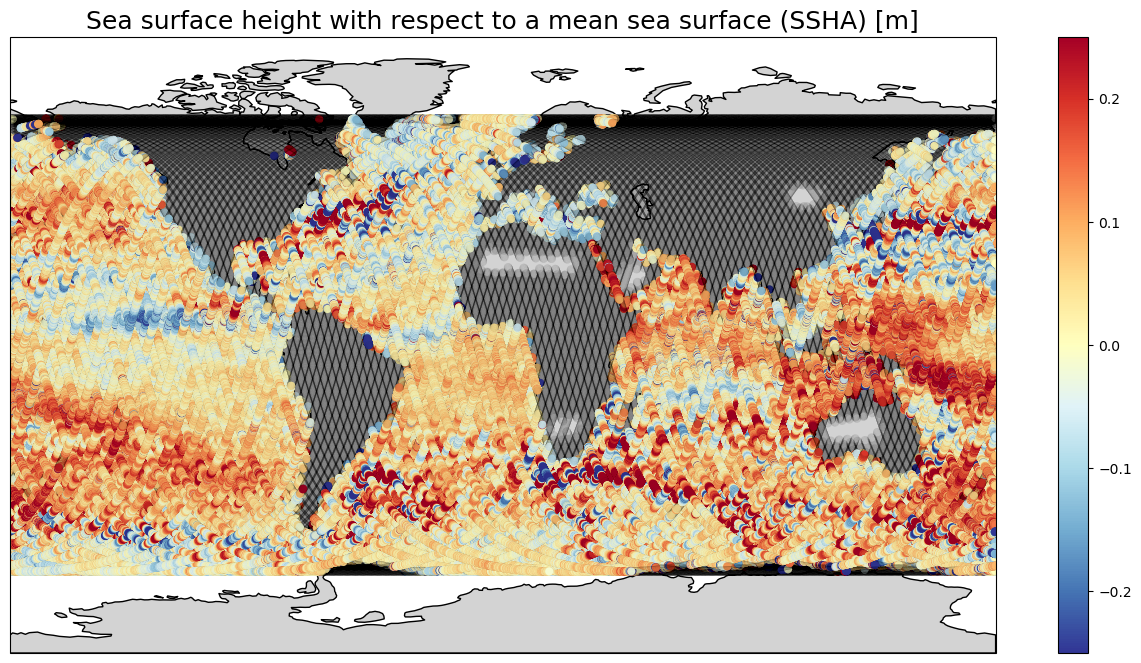

In [10]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree(), aspect=1.25)
ax.set_extent([-180, 180, -90, 90], crs=cartopy.crs.PlateCarree())
#zoom on the Mediterranean Western basin
#ax.set_extent([0, 25, 30, 50], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=0)
# actually plot the data
tracks = ax.scatter(lon, lat, c=ssha, cmap='RdYlBu_r', marker='o',  vmin=-0.25, vmax=0.25, edgecolors='black', linewidth=0.01)
cbar = plt.colorbar(tracks)
plt.title('Sea surface height with respect to a mean sea surface (SSHA) [m]', size=18)
plt.show()

<div class="alert alert-info" role="alert">

## 4. <a id='section4'></a>Spatially binning the along-track data
[Back to top](#TOC_TOP)

</div>

We combine the datasets from the two groups in one, extracting only ssha (which is in the Ku group), and the coordinates/dimension (which are in the group above). We define the attributes which can be needed for an output NetCDF, so as to be able to use it as such afterwards (not necessary if you only want to compute the mean of the cycle).

In [11]:
#creating a proper dataset with useful attributes for a nc files 
ds = xr.Dataset(
    {'ssha01': (['time'],  \
                ssha.data, \
                {'standard_name' : 'sea_surface_height_above_sea_level', \
                 'units' : "m", \
                 'coordinates' : "longitude latitude"})}, 
    coords={
        'time': (['time'], \
                 time.data, \
                 {'standard_name' : 'time', \
                  #'units' : "seconds since 2000-01-01 00:00:00.0", \ # a unit is kept in the concatenation by this dimension
                  'coordinates' : "longitude latitude"}),
        'lon01': (['time'], lon.data, \
                {'standard_name' : 'longitude', \
                 'units' : "degrees_east", \
                 'coordinates' : "longitude latitude"}), 
        'lat01': (['time'], lat.data, \
                  {'standard_name' : 'latitude', \
                   'units' : "degrees_north", \
                   'coordinates' : "longitude latitude"})})

# a few time steps are duplicated at the end of some passes and at the beggining of the following one. We are removing them.
## solution with an xarray version > 2022, to be tested 
#ds = ds.drop_duplicates(dim="time",  keep='first')
# solution with xarray versions before 2022: selection only non (~) duplicated times
ds = ds.sel(time=~ds.indexes['time'].duplicated())

ds.to_netcdf('ssha_full_cycle_'+str(cycle)+'.nc')
s6cycle01.close()
s6cycle01ku.close()
ds

<xarray.Dataset> Size: 27MB
Dimensions:  (time: 849234)
Coordinates:
  * time     (time) datetime64[ns] 7MB 2022-04-17T06:54:38 ... 2022-04-27T04:...
    lon01    (time) float64 7MB dask.array<chunksize=(3343,), meta=np.ndarray>
    lat01    (time) float64 7MB dask.array<chunksize=(3343,), meta=np.ndarray>
Data variables:
    ssha01   (time) float64 7MB dask.array<chunksize=(3343,), meta=np.ndarray>

Now we are "binning" the data in the two spatial dimensions, i.e. averaging them over boxes in longitude/latitude ; we do not take into account values at NaN (any arithmetic operation with a NaN in will result in NaN: we want to ignore those values when they are only part of the pixel - not when a pixel is always at NaN). However, note that due to the size of the pixels we are defining, a lot of pixels will be in part over lands. 

In [12]:
# steps in degrees for the pixels we will create. 
# do not go much under those values, due to the gap between tracks in longitude (315 km at the Equator)
steplon = 3
steplat = 1
lat_min = -90. 
lon_min = 0.
lat_max = 90; lon_max = 360 

#creating the arrays of longitudes and latitudes
# NB. last point is not within the array in Python.
binnedlon = np.arange(lon_min,lon_max+steplon,steplon)
binnedlat = np.arange(lat_min,lat_max+steplat,steplat)
test = stats.binned_statistic_2d(ds.lon01, ds.lat01, ds.ssha01, statistic=np.nanmean,  bins=[binnedlon,binnedlat])

The binned_statistic-2d is outputing a (x,y) ndarray. However, in particular to plot the data on a map, you'll need a (lat,lon) matrix, so you have to "transpose" your ndarray (i.e. to switch dimensions).

Moreover, not to miss the 0 - 360 transition, we added one point to the statistics. 
We are choosing to reference the pixels ("registration") at their center ("pixel registration"), so we shift by half a pixel the lon/lat defining each pixel. The other usual solution is top left ("gridline registration").

In [13]:
#defining an output xarray dataset
binnedgrid = xr.Dataset({
    'binnedssha': xr.DataArray(
        data = test.statistic.T,
        dims = ['latitude','longitude'],
        coords =  {'latitude': test.y_edge[:-1]+ steplat/2, 'longitude': test.x_edge[:-1] + steplon/2},
        attrs = {'long_name': 'sea surface heights anomalies by lat/lon bins',
                 'units': 'm',
                 'standard_name':
                 'sea_surface_height_above_sea_level'}
        )
    },
    #global attributes can be added
    attrs = { }
    )
binnedgrid

<xarray.Dataset> Size: 175kB
Dimensions:     (latitude: 180, longitude: 120)
Coordinates:
  * latitude    (latitude) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude   (longitude) float64 960B 1.5 4.5 7.5 10.5 ... 352.5 355.5 358.5
Data variables:
    binnedssha  (latitude, longitude) float64 173kB nan nan nan ... nan nan nan

In [14]:
# saving the output binned grid in a netCDF file
binnedgrid.to_netcdf('binned_grid.nc')

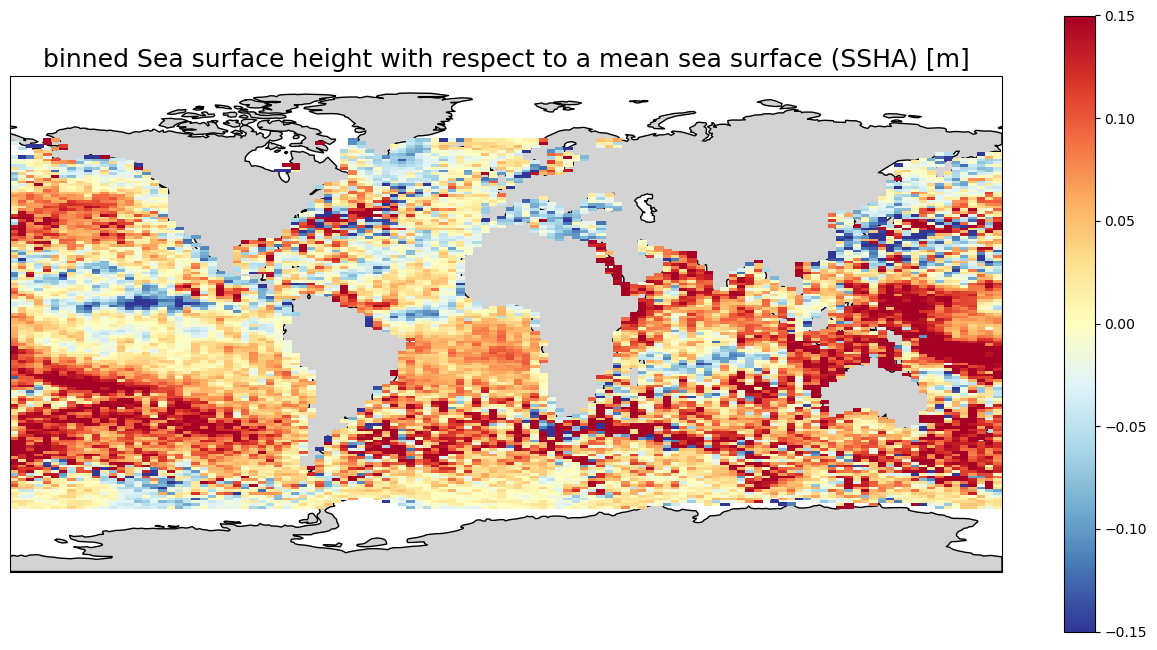

In [15]:
# plotting the resulting grid. It is a very pixellized map - which was the objective.

plt.figure(figsize=(16,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=0.))
# overlaying the continents on top makes a nicer plot (zorder continent > zorder SSHA).
# ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k')
ax.set_extent([-180, 180, lat_min, lat_max])
mymap = ax.pcolor(binnedgrid.longitude, binnedgrid.latitude, binnedgrid.binnedssha, cmap='RdYlBu_r', vmin=-0.15, vmax=0.15, shading=None, zorder=0)
# Add a colorbar to the map object to give scale
plt.colorbar(mymap, ax=ax)
# Add a title to the map object
plt.title('binned Sea surface height with respect to a mean sea surface (SSHA) [m]', size=18)
plt.show()                  

<div class="alert alert-info" role="alert">

## 5. <a id='section5'></a>Calculating the global mean for this cycle
[Back to top](#TOC_TOP)

</div>

Computing the global mean for the cycle. The area of each pixel is different depending on the latitude, so we weight our pixels with cos(latitude) so as not to overestimate the high latitude contributions. One more refinement would be to weight each binned pixel with the amount of ocean within (i.e. not count land in the whole pixel "weight"; here we overweight coastal areas in the computation). This is done in at least some of the available MSL time series disseminated by Data centers. 

In [16]:
weights = np.cos(np.deg2rad(binnedgrid['latitude']))
weights.name = "weights"
ssha_weighted = binnedgrid['binnedssha'].weighted(weights)
ssha_weighted
weighted_mean = ssha_weighted.mean(("longitude", "latitude"))
print("the Global mean sea level value (with respect to a 20-year mean) for this cycle is: ", np.around(weighted_mean.values,4), " meters")

the Global mean sea level value (with respect to a 20-year mean) for this cycle is:  0.0412  meters


This was an exercice to show how it can be done. <b>It is not, however, the whole processing to do to output a complete 30-year long time series showing sea level long-term changes and trend: once done on every single cycle (since Jan. 1993! - use harmonized data with homogeneous corrections and references)</b>. To have an interannual trend you need to remove seasonal cycles, filter for 60-day and six-month periodic variations. You also have intermission biases to apply when switching from one satellite to its follow-on. You can also (or not) remove a bias to take the Glacial Isostatic Adjustement into account (-0.3 mm/yr). See https://www.aviso.altimetry.fr/en/data/products/ocean-indicators-products/mean-sea-level/processing-and-corrections.html for the details of the complete computation of a mean sea level time series from the reference mission.

Beware that the zero level of this computation is *_not_* the one you can usually see on altimetry-derived mean sea level curves : here zero is set by construction at the 20-year mean, while most usually the zero of MSL time series is set at the level of the beginning of the series (in 1993). This becomes more obvious when you compare the curves in sections 6 and 7.

<div class="alert alert-info" role="alert">

## 6. <a id='section6'></a>Plotting individual altimetry mission time series
[Back to top](#TOC_TOP)

</div>

Several altimetry missions have followed each other since 1991. The series considered as the reference is the Topex/Poseidon - Jason-1, -2 & -3 - Sentinel-6 Michael Freilich one, since all of them were altimetry-dedicated missions with the highest accuracy at their time, non-sunsynchronous to avoid tidal aliasing and since the series has been uninterrupted since October 1992 with systematic calibration phases where each follow-on was put a few seconds after of before its predecessor to be intercalibrated. 
However, the other altimetry missions, once readjusted (they show biases and some other differences at Level 2, including a difference of coverage in latitude), show the same global trend. 

**Note that, when looking at the curve, fitting a linear trend is clearly no longer relevant, even if it has been for the first 25 years or so of measurements. The acceleration of sea level rise has been evident for a few years, so non-linear trends are now computed.**

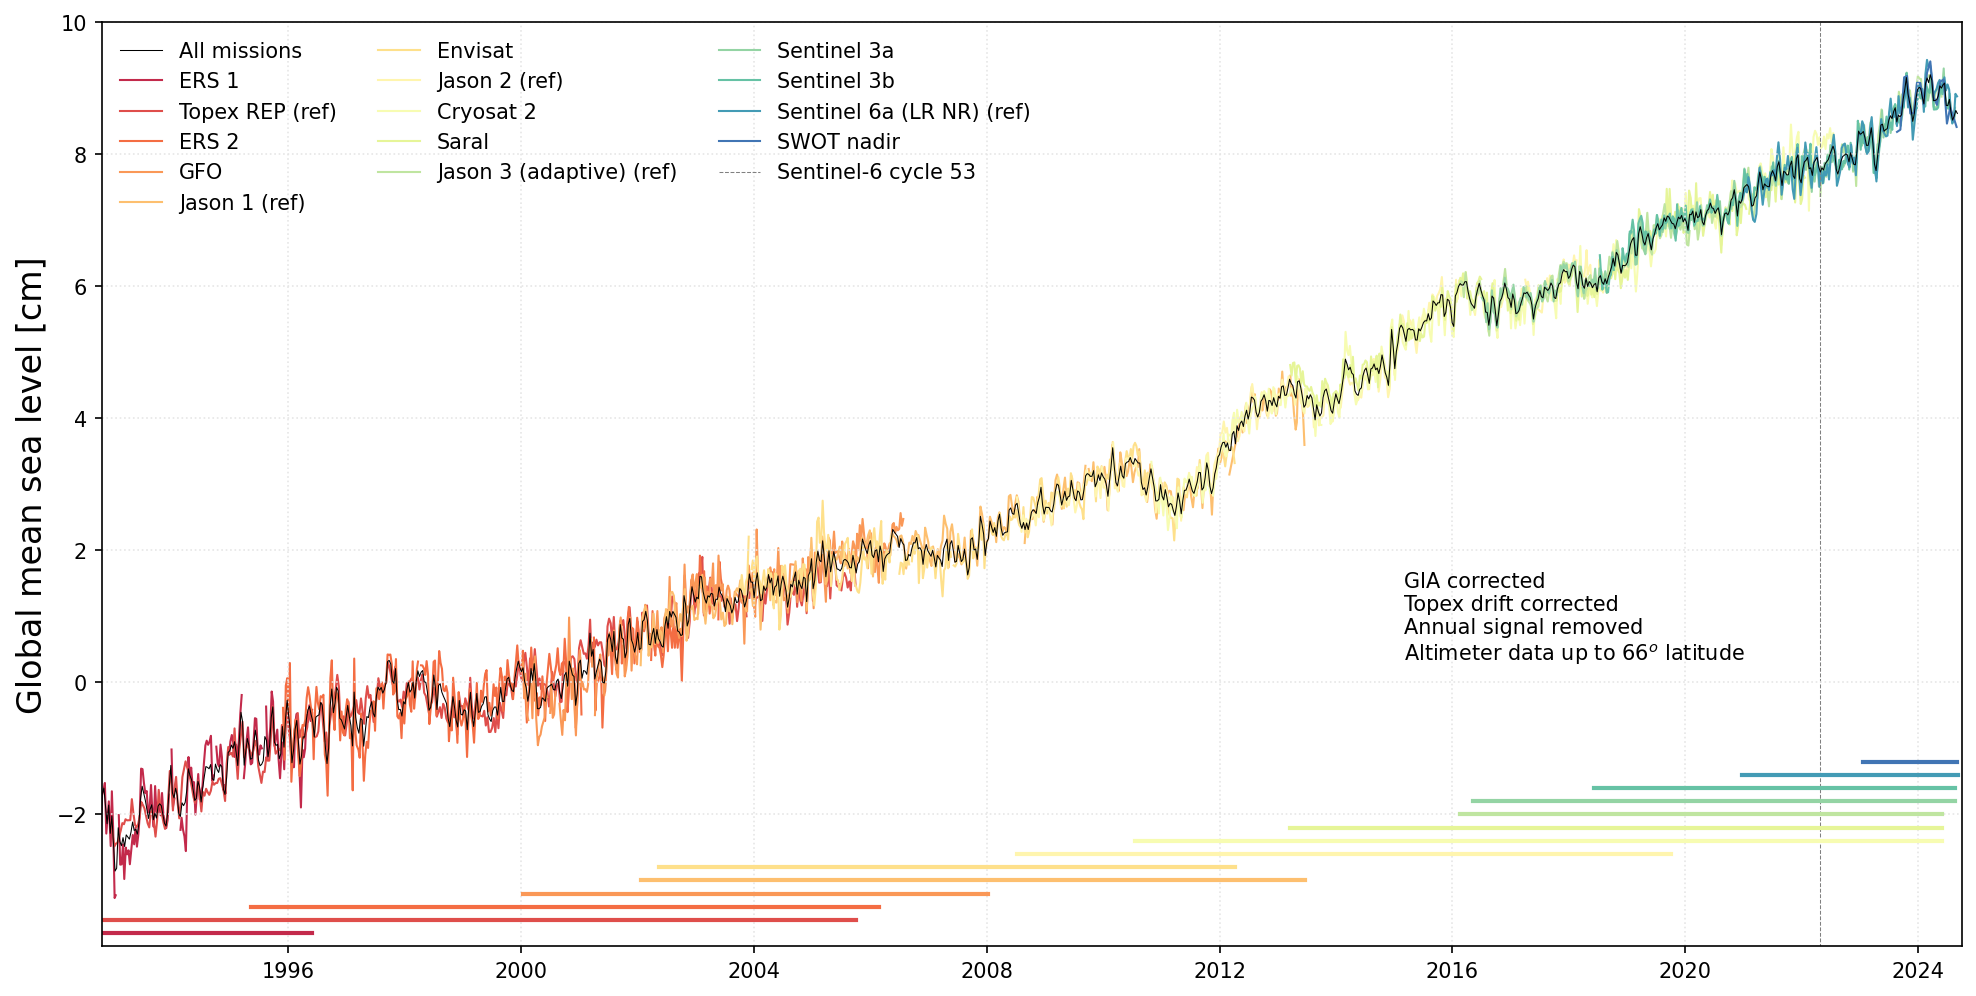

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
input_files = glob.glob(os.path.join("precomputed", "*.txt"))
labels = []
traces = []
count = 0

for input_file in sorted(input_files):
    vals = np.genfromtxt(input_file, comments="#", dtype="str")
    MSL = vals[:, 1].astype(float)*100
    dates = np.array([datetime.datetime.strptime(i[:19], "%Y-%m-%dT%H:%M:%S") for i in vals[:, 0]])
    if "All" in input_file:
        p1, = plt.plot(dates, MSL, linewidth=0.5, c="k", zorder=10)
        MSL_all = MSL.copy()
        dates_all = np.array([i.toordinal() for i in dates])
    else:
        p1, = plt.plot(dates, MSL, linewidth=1, c=plt.cm.Spectral(count/len(input_files)), zorder=1)
        p2, = plt.plot(dates, np.ones(len(MSL))*(-4 + count*2/10), linewidth=2, c=plt.cm.Spectral(count/len(input_files)), zorder=2)
    traces.append(p1)
    labels.append(os.path.basename(input_file).split('-')[-1].replace('.txt','').replace("_", " "))
    count = count + 1

p1, = plt.plot([time.mean().values, time.mean().values], [-10, 10], c="0.5", linestyle="--", linewidth=0.5, zorder=1)
traces.append(p1)
labels.append(f"Sentinel-6 cycle {cycle}")
plt.xlim([datetime.datetime(1992, 10, 17), datetime.datetime(2024, 9, 30)])
plt.ylabel('Global mean sea level [cm]', fontsize=16)
plt.ylim([-4,10])
ax.set_yticks(range(-2,12,2))
plt.grid(linestyle=":", color="0.9")
plt.legend(traces, labels, frameon=False, ncol=3)

ax.annotate("GIA corrected\nTopex drift corrected\nAnnual signal removed\nAltimeter data up to 66$^{o}$ latitude", (0.7, 0.31), xycoords="axes fraction", color="k")
plt.savefig("MSL_all_missions_time_series.png", bbox_inches="tight")

<div class="alert alert-info" role="alert">

## 7. <a id='section6'></a>Comparing MSL time series from the Copernicus Marine Service and CNES/AVISO
[Back to top](#TOC_TOP)

</div>

Several groups worldwide are publishing altimetry Mean Sea Level estimates. They agree within the error margins (+/-0.3 mm/yr) - computations are slightly different in a number of ways, so the figures are slightly different.

In Europe, see: <br>
- Copernicus Ocean State Report, issue 6, 2022, Journal of Operational Oceanography, https://doi.org/10.1080/1755876X.2022.2095169 for the CMEMS Mean Sea Level and analysis ; https://marine.copernicus.eu for the data access.
- Guérou, A., Meyssignac, B., Prandi, P., Ablain, M., Ribes, A., Bignalet-Cazalet, F., Current observed global mean sea level rise and acceleration estimated from satellite altimetry and the associated measurement uncertainty, Ocean Sci., 19-2 pp431-451, https://doi.org/10.5194/os-19-431-2023 for the AVISO Mean Sea Level ; AVISO: https://www.aviso.altimetry.fr/en/data/products/ocean-indicators-products/mean-sea-level/data-acces.html
Note that, at the beginning of the 1990s, the Topex altimeter on the Topex/Poseidon mission (NASA/CNES) was drifting, before being replaced by its redundant instrument ("Topex B") in 1996. Correction has been recently proposed for this, in the frame of the reprocessing of this mission by NASA and CNES. 

In [18]:
MSL_time_series = copernicusmarine.open_dataset(
           dataset_id = "omi_climate_sl_global_area_averaged_anomalies")

Fetching catalog: 100%|███████████████████████████| 3/3 [00:07<00:00,  2.46s/it]
INFO - 2024-09-27T11:55:13Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-09-27T11:55:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-09-27T11:55:13Z - Service was not specified, the default one was selected: "omi-arco"


The CNES/CLS/LEGOS time series, disseminated by AVISO includes the TopexA drift but does not (yet) apply it. To apply it, one need to remove it from the MSL variable. But this will shift the whole curve. To un-shift it, you can add the last value of the correction (a constant, also applied after the switch to Topex B). Note, however, that the ordinate at the beginning of the curve is not the main point of such studies (the use is to put the zero at the first year of Topex/Poseidon measurement), but more the overall trend of the data along the 30 years of available measurements.  

In [19]:
MSL_time_series_aviso = xr.open_mfdataset(os.path.join(os.getcwd(), "precomputed", "MSL_Serie_MERGED_Global_AVISO_GIA_Adjust_Filter6m_NRT.nc"))

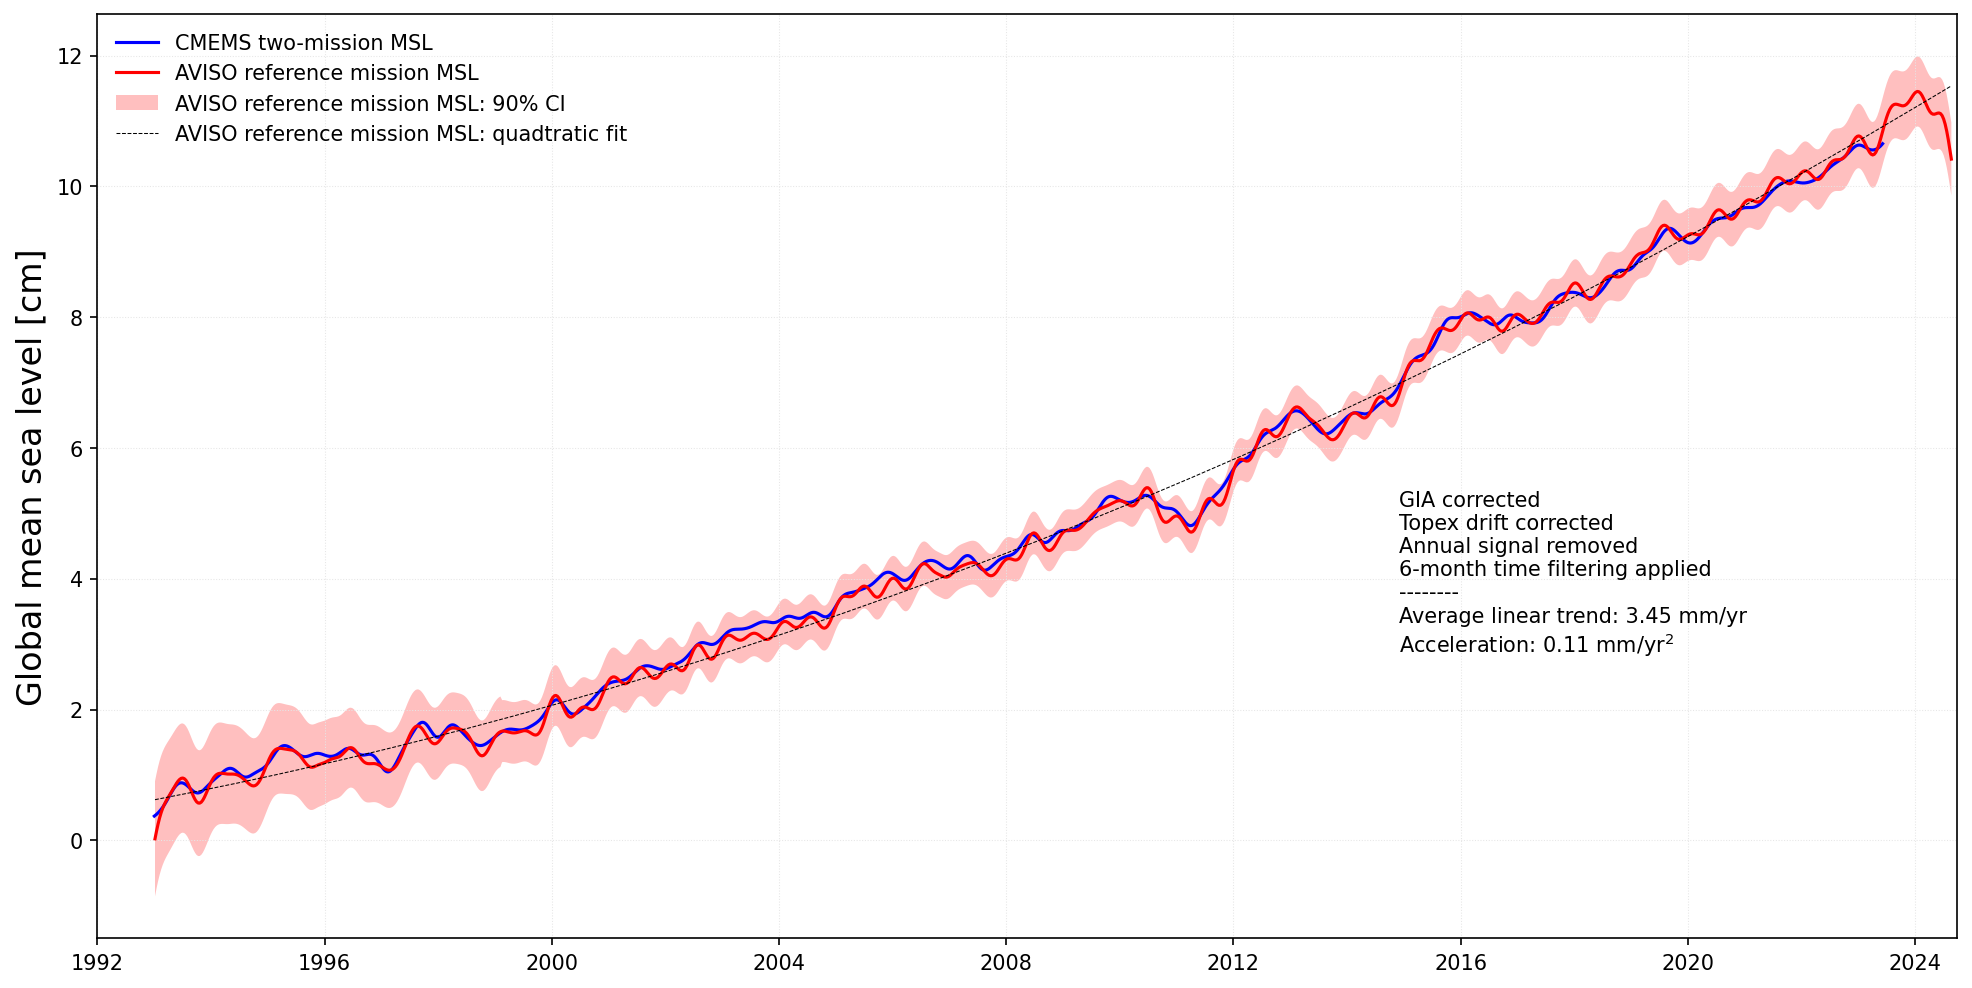

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=150)

for data, label in zip([MSL_time_series, MSL_time_series_aviso], ["CMEMS", "AVISO"]):
    y = pd.to_datetime(data.time)
    years = np.array([i.toordinal() for i in y]).astype(float)/365.2422

    # plot data
    if label == "CMEMS":
        p1, = ax.plot(data.time, data.MSL_filtered_GIA_TPA_corrected_adjusted, c="b", zorder=2)
    elif label == "AVISO":
        MSL = (data.msl - data.tpa_correction_to_substract + data.tpa_correction_to_substract[-1])*100
        p2, = ax.plot(data.time, MSL, c="r", zorder=3)
        p3  = ax.fill_between(data.time, MSL - data.envelop*100, MSL + data.envelop*100, color="r", edgecolor=None, alpha=0.25, zorder=1)        

        # weighted least squares trend calculations
        errors = np.array(MSL) - np.mean(np.array(MSL))
        error_variance = np.var(errors)        
        order_1 = np.polyfit(years, MSL, 1, w=np.ones(len(MSL))/error_variance, full=True)
        order_2 = np.polyfit(years, MSL, 2, w=np.ones(len(MSL))/error_variance, full=True)
        slope_1 = order_1[0][0]*10
        slope_2 = order_2[0][0]*10*2
        
        p4, = ax.plot(data.time, order_2[0][0]*years**2 + order_2[0][1]*years + order_2[0][2], linewidth=0.5, linestyle="--", color="k", zorder=4)

    ax.set_xlim([datetime.datetime(1992,1,1), datetime.datetime(2024,9,30)])
    ax.grid(linestyle=":", color="0.9", linewidth=0.5)
    
ax.annotate(f"GIA corrected\nTopex drift corrected\nAnnual signal removed\n6-month time filtering applied\n\
--------\nAverage linear trend: {'%.2f' % slope_1} mm/yr\nAcceleration: {'%.2f' % slope_2} mm/yr$^{2}$", (0.7, 0.31), xycoords="axes fraction", color="k")

plt.ylabel('Global mean sea level [cm]', fontsize=16)
ax.legend([p1, p2, p3, p4], ['CMEMS two-mission MSL', 'AVISO reference mission MSL', 'AVISO reference mission MSL: 90% CI', 'AVISO reference mission MSL: quadtratic fit'], frameon=False)
plt.savefig("MSL_reference_missions_time_series.png", bbox_inches="tight")

<div class="alert alert-info" role="alert">

## 8. <a id='section8'></a>Fetching a global sea-level trend maps from the Copernicus Marine Service
[Back to top](#TOC_TOP)

</div>

The whole ocean does not show the same sea level variation trend everywhere - some areas are rising fast, other less so. Very few areas show a decrease, but they exist. 
The acceleration rate of the rise is even less identical everywhere.
These maps are produced by computing the trends at each grid point from the daily gridded (L4) maps. 

In [21]:
MSL_map = copernicusmarine.open_dataset(
           dataset_id = "omi_climate_sl_global_regional_trends")

INFO - 2024-09-27T11:55:15Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-09-27T11:55:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-09-27T11:55:15Z - Service was not specified, the default one was selected: "omi-arco"


In [22]:
MSL_map

<xarray.Dataset> Size: 8MB
Dimensions:                     (longitude: 1440, latitude: 720)
Coordinates:
  * latitude                    (latitude) float64 6kB -89.88 -89.62 ... 89.88
  * longitude                   (longitude) float64 12kB -179.9 -179.6 ... 179.9
Data variables:
    acceleration_TPA_corrected  (longitude, latitude) float32 4MB ...
    trend_GIA_TPA_corrected     (longitude, latitude) float32 4MB ...
Attributes:
    Conventions:  CF-1.7
    area:         GLOBAL
    comment:      Period : 1993-01-01 to 2023-06-07.
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information
    institution:  CLS
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    references:   http://marine.copernicus.eu
    source:       The values are based on the two-satellite merged altimeter ...
    title:        Map of Sea Level Trends from DUACS DT2021

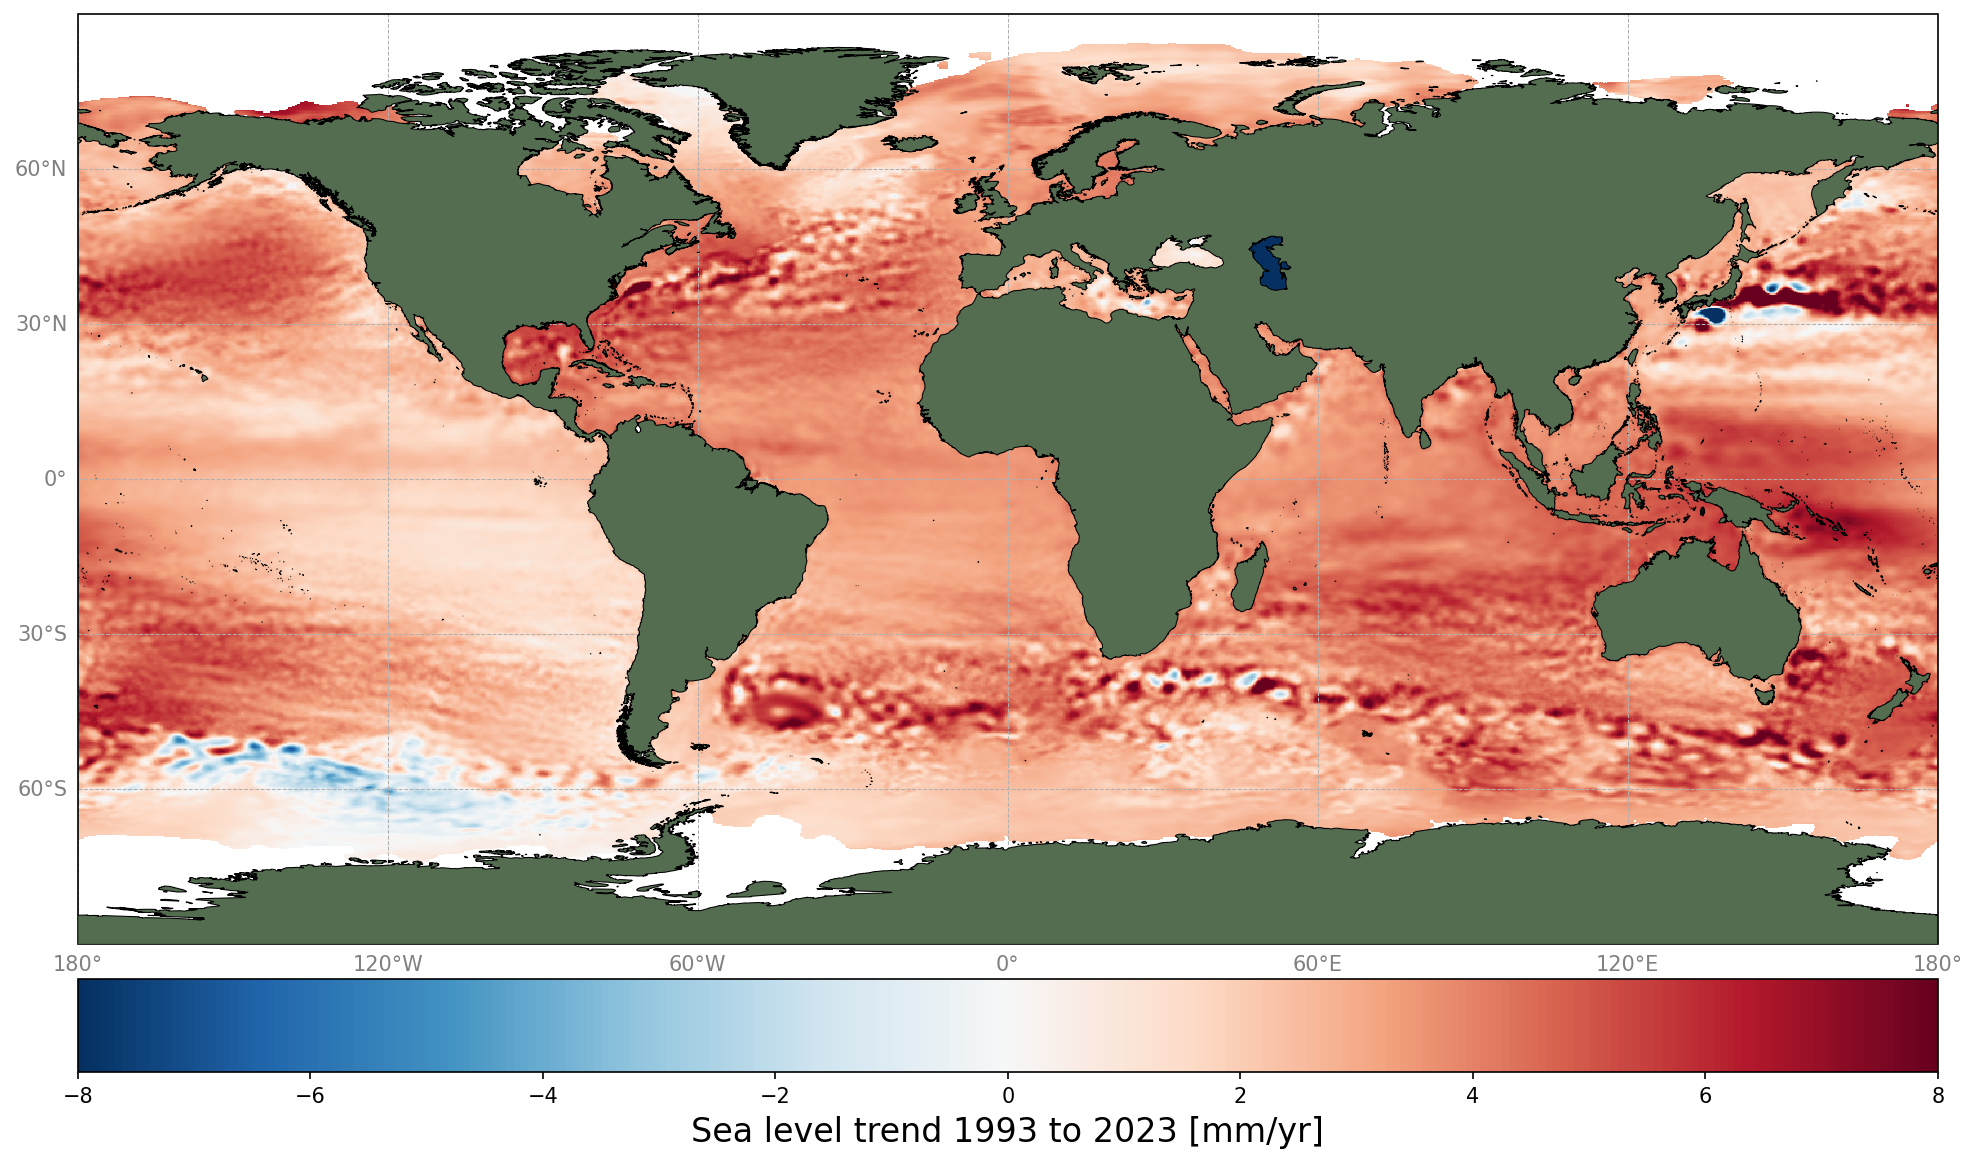

In [23]:
fig, m = plt.subplots(1, 1, figsize=(16, 12), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})
p1 = m.pcolormesh(MSL_map.longitude, MSL_map.latitude, MSL_map.trend_GIA_TPA_corrected.T, cmap="RdBu_r", vmin=-8, vmax=8)
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}
cbar = plt.colorbar(p1, orientation='horizontal', pad=0.025)
cbar.set_label(f"Sea level trend {pd.DatetimeIndex(MSL_time_series.time).year[0]} to {pd.DatetimeIndex(MSL_time_series.time).year[-1]} [mm/yr]", fontsize=16)
plt.savefig("MSL_regional_trends.png", bbox_inches="tight")

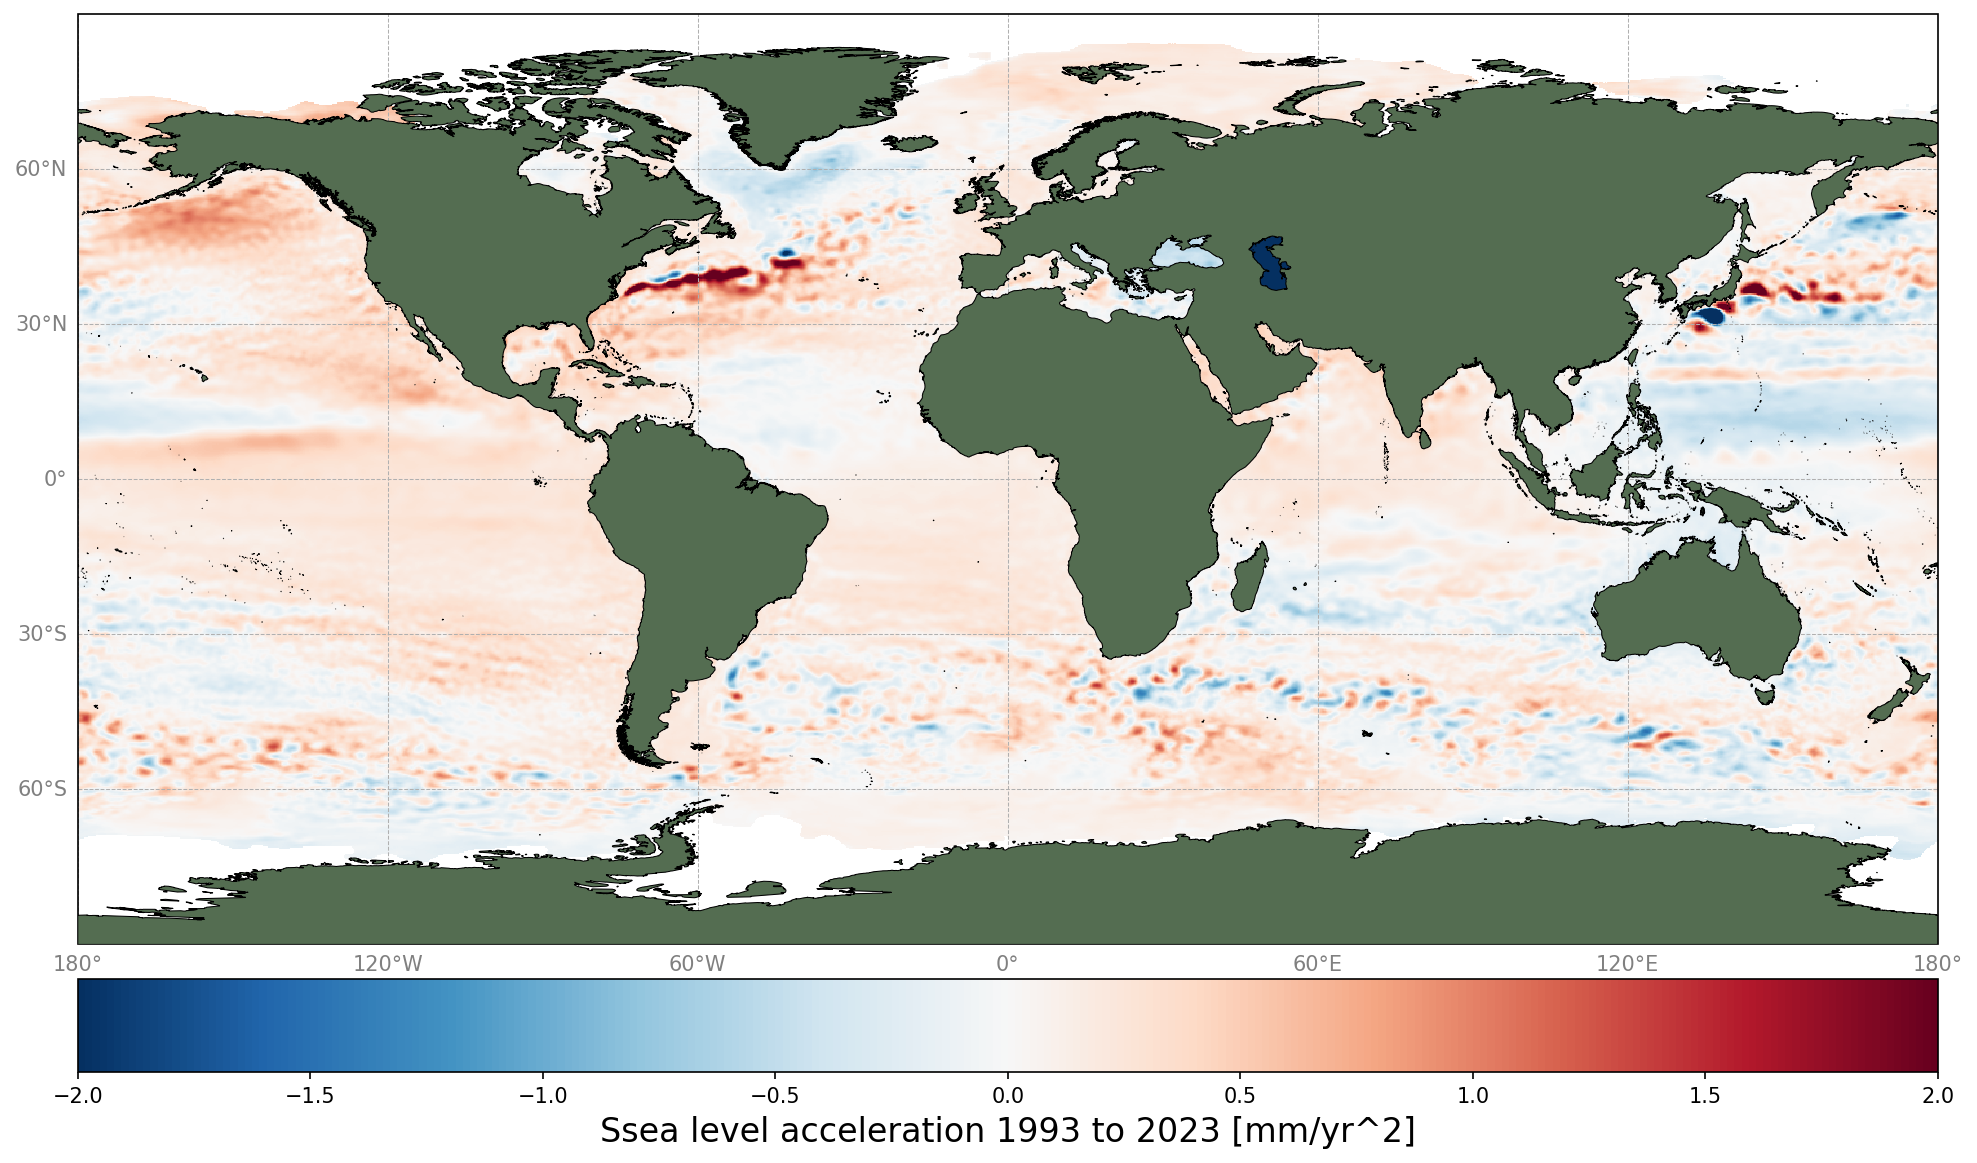

In [24]:
fig, m = plt.subplots(1, 1, figsize=(16, 12), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})
p1 = m.pcolormesh(MSL_map.longitude, MSL_map.latitude, MSL_map.acceleration_TPA_corrected.T, cmap="RdBu_r", vmin=-2, vmax=2)
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}
cbar = plt.colorbar(p1, orientation='horizontal', pad=0.025)
cbar.set_label(f"Ssea level acceleration {pd.DatetimeIndex(MSL_time_series.time).year[0]} to {pd.DatetimeIndex(MSL_time_series.time).year[-1]} [mm/yr^2]", fontsize=16)
plt.savefig("MSL_regional_trend_accel.png", bbox_inches="tight")

<div class="alert alert-info" role="alert">

## 9. <a id='section9'></a>Conclusions
[Back to top](#TOC_TOP)

</div>

<hr>
<a href="../../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>